<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/DUDL_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import time

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from IPython import display
display.set_matplotlib_formats('svg')

# create dataset

In [41]:
# add two integers between -10 to +10
# input to the model is two integers, output is their sum
data = np.array([[i, j] for i in range(-10, 10) for j in range(-10, 10)])
print(data.shape)
labels = data[:, 0] + data[:, 1]
labels = labels.reshape(-1, 1)
print(labels.shape)

(400, 2)
(400, 1)


In [55]:
# converting to tensor
dataT = torch.tensor(data).float()
labelsT = torch.tensor(labels).float()

# split into train devset test
train_data, devtest_data, train_labels, devtest_labels = train_test_split(dataT, labelsT, train_size=.8, shuffle=True)
dev_data, test_data, dev_labels, test_labels = train_test_split(devtest_data, devtest_labels, train_size=.5, shuffle=True)

# convert to pytorch dataset
train_data = TensorDataset(train_data, train_labels)
dev_data = TensorDataset(dev_data, dev_labels)
test_data = TensorDataset(test_data, test_labels)

# translate to dataloader
batchsize = 16
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
dev_loader = DataLoader(dev_data, batch_size=dev_data.tensors[0].shape[0])
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

print(f'total number of batch {len(train_loader)} with everybatch {batchsize} samples')


total number of batch 20 with everybatch 16 samples


In [56]:
# shapes
print('train: ', train_data.tensors[0].shape)
print('dev: ', dev_data.tensors[0].shape)
print('test: ', test_data.tensors[0].shape)

train:  torch.Size([320, 2])
dev:  torch.Size([40, 2])
test:  torch.Size([40, 2])


## Create a Model

In [57]:
class SumModel(nn.Module):
    def __init__(self):
        super().__init__()

        # input layer
        self.input = nn.Linear(2, 16)

        # hidden layer
        self.fc1 = nn.Linear(16, 16)

        # output layer
        self.output = nn.Linear(16, 1)

    # forward pass
    def forward(self, x):

        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = self.output(x)
        return x

In [58]:
# test the model
net = SumModel()
print(net)
net(torch.randn(10, 2))

SumModel(
  (input): Linear(in_features=2, out_features=16, bias=True)
  (fc1): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)


tensor([[ 0.0717],
        [-0.1078],
        [-0.1317],
        [-0.0378],
        [ 0.1062],
        [-0.0161],
        [ 0.0737],
        [ 0.1199],
        [ 0.0410],
        [ 0.2647]], grad_fn=<AddmmBackward0>)

# A function that will train the model

In [65]:
def function2trainTheModel():

    # number of epochs
    numepochs = 100

    # model creation
    addnet = SumModel()

    # lossfun
    lossfun = nn.MSELoss()

    # optimizer
    optimizer = torch.optim.SGD(addnet.parameters(), lr=0.001)

    trainLoss = torch.zeros(numepochs)
    devLoss = torch.zeros(numepochs)

    start_time = time.process_time()


    for epochi in range(numepochs):

        addnet.train()

        batchLoss = []
        for X, y in train_loader:
            # forward pass
            yHat = addnet(X)
            loss = lossfun(yHat, y)

            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
        
        trainLoss[epochi] = np.mean(batchLoss)

        # eval mode
        addnet.eval()
        X, y = next(iter(dev_loader))
        with torch.no_grad():
            yHat = addnet(X)
        
        devLoss[epochi] = lossfun(yHat, y).item()
        time_elapsed = time.process_time() - start_time

        print(f'{epochi}/{numepochs}: time elapsed: {time_elapsed}, train Loss: {trainLoss[-1]:.2f}, dev Loss: {devLoss[-1]:.2f}')

    # output return
    return trainLoss, devLoss, addnet







In [66]:
# It's time to start training
trainLoss, devLoss, addnet = function2trainTheModel()


0/100: time elapsed: 0.01706225399999539, train Loss: 0.00, dev Loss: 0.00
1/100: time elapsed: 0.032645657999999855, train Loss: 0.00, dev Loss: 0.00
2/100: time elapsed: 0.047241915999997275, train Loss: 0.00, dev Loss: 0.00
3/100: time elapsed: 0.06190120699999824, train Loss: 0.00, dev Loss: 0.00
4/100: time elapsed: 0.07725872199999628, train Loss: 0.00, dev Loss: 0.00
5/100: time elapsed: 0.09179081099999564, train Loss: 0.00, dev Loss: 0.00
6/100: time elapsed: 0.10611664999999704, train Loss: 0.00, dev Loss: 0.00
7/100: time elapsed: 0.1205805720000015, train Loss: 0.00, dev Loss: 0.00
8/100: time elapsed: 0.13972152999999565, train Loss: 0.00, dev Loss: 0.00
9/100: time elapsed: 0.15827003799999773, train Loss: 0.00, dev Loss: 0.00
10/100: time elapsed: 0.17779348799999894, train Loss: 0.00, dev Loss: 0.00
11/100: time elapsed: 0.19419352099999543, train Loss: 0.00, dev Loss: 0.00
12/100: time elapsed: 0.2096829269999958, train Loss: 0.00, dev Loss: 0.00
13/100: time elapsed: 

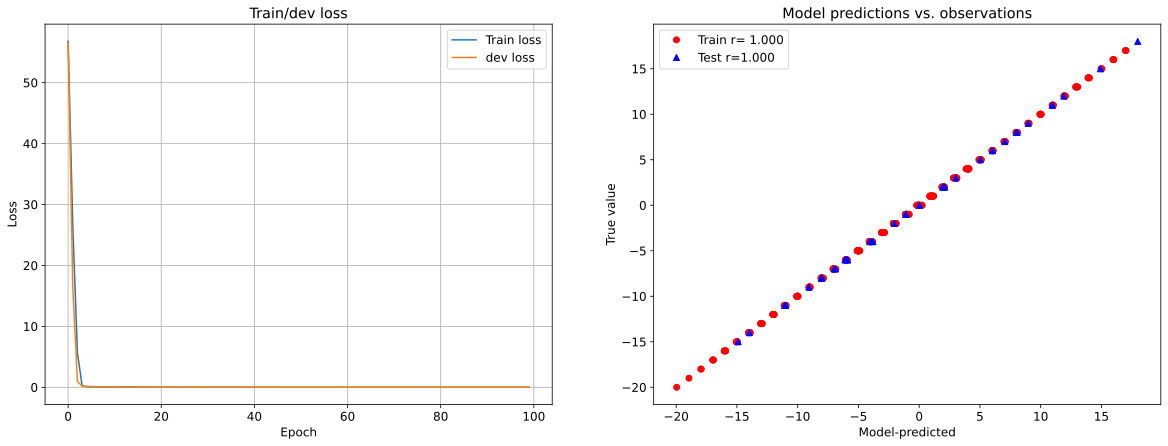

In [64]:
fig, ax = plt.subplots(1,2, figsize=(20, 7))
plt.rcParams.update({'font.size': 12})

ax[0].plot(trainLoss, label='Train loss')
ax[0].plot(devLoss, label='dev loss')
ax[0].set_title('Train/dev loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid()

# show predictions and real values
yHatTrain = addnet(train_data.tensors[0])
yHatTest = addnet(test_data.tensors[0])
ax[1].plot(yHatTrain.detach(), train_labels, 'ro')
ax[1].plot(yHatTest.detach(), test_labels, 'b^')
ax[1].set_xlabel('Model-predicted')
ax[1].set_ylabel('True value')
ax[1].set_title('Model predictions vs. observations')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHatTrain.detach().T, train_labels.T)[1, 0]
corrTest = np.corrcoef(yHatTest.detach().T, test_labels.T)[1, 0]
ax[1].legend([f'Train r={corrTrain: .3f}', f'Test r={corrTest:.3f}'])

plt.show()

In [ ]:
# run the model 10 times to check reproducibility
